# Decision Tree & Random Forest Classifier
------------
Similar to the previous notebook onDT & RF Classifiers, but using Social Network Ads dataset.

In [12]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(320, 2) (80, 2) (320,) (80,)


In [9]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_test[0:5]

array([[ 0.85286166, -0.8130675 ],
       [ 0.85286166, -0.69484344],
       [-0.96530065,  0.42828513],
       [ 0.08731964, -0.84262351],
       [-1.34807166, -1.28596373]])

In [29]:
model = DecisionTreeClassifier(max_depth=4, criterion='gini')
model = model.fit(X_train, y_train)

In [30]:
y_pred = model.predict(X_test)

In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50  5]
 [ 2 23]]


In [32]:
accuracy = (cm[0,0] + cm[1,1]) * 1.0 / (len(y_pred))
print("Accuracy = %.2f%%" % (accuracy * 100))

recall = cm[0,0] * 1.0 / (cm[0,0] + cm[0,1])
print("Recall = %.2f%%" % (recall * 100))

precision = cm[0,0] * 1.0 / (cm[0,0] + cm[1,0])
print("Precision = %.2f%%" % (precision * 100))

f1 = (2 * precision * recall) / (precision + recall)
print("F1 Score = %.2f%%" % (f1 * 100))

Accuracy = 91.25%
Recall = 90.91%
Precision = 96.15%
F1 Score = 93.46%


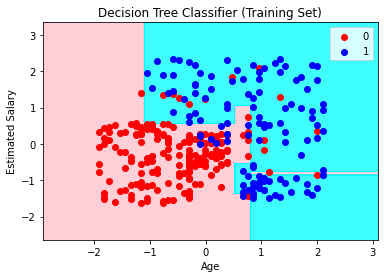

In [36]:
X_set, y_set = X_train, y_train

X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))

plt.contourf(X1,X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('pink','cyan')))

plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))

for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], color=ListedColormap(('red','blue'))(i) ,label= j)

plt.title('Decision Tree Classifier (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

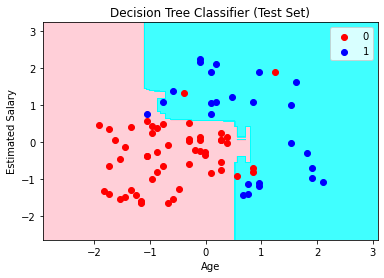

In [43]:
X_set, y_set = X_test, y_test

X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))

plt.contourf(X1,X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('pink','cyan')))

plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))

for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], color=ListedColormap(('red','blue'))(i) ,label= j)

plt.title('Decision Tree Classifier (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [45]:
model = RandomForestClassifier(max_depth=3, criterion='entropy')
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [46]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50  5]
 [ 1 24]]


In [47]:
accuracy = (cm[0,0] + cm[1,1]) * 1.0 / (len(y_pred))
print("Accuracy = %.2f%%" % (accuracy * 100))

recall = cm[0,0] * 1.0 / (cm[0,0] + cm[0,1])
print("Recall = %.2f%%" % (recall * 100))

precision = cm[0,0] * 1.0 / (cm[0,0] + cm[1,0])
print("Precision = %.2f%%" % (precision * 100))

f1 = (2 * precision * recall) / (precision + recall)
print("F1 Score = %.2f%%" % (f1 * 100))

Accuracy = 92.50%
Recall = 90.91%
Precision = 98.04%
F1 Score = 94.34%


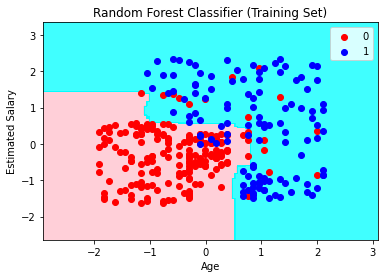

In [48]:
X_set, y_set = X_train, y_train

X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))

plt.contourf(X1,X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('pink','cyan')))

plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))

for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], color=ListedColormap(('red','blue'))(i) ,label= j)

plt.title('Random Forest Classifier (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

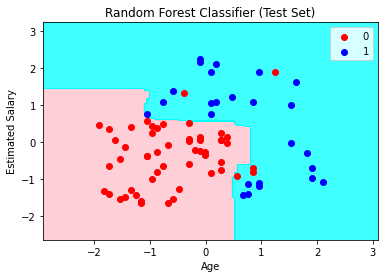

In [49]:
X_set, y_set = X_test, y_test

X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))

plt.contourf(X1,X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('pink','cyan')))

plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))

for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], color=ListedColormap(('red','blue'))(i) ,label= j)

plt.title('Random Forest Classifier (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()